# Separable Convolution vs Normal Convolution
* Medium Article https://rb.gy/2f0r1e

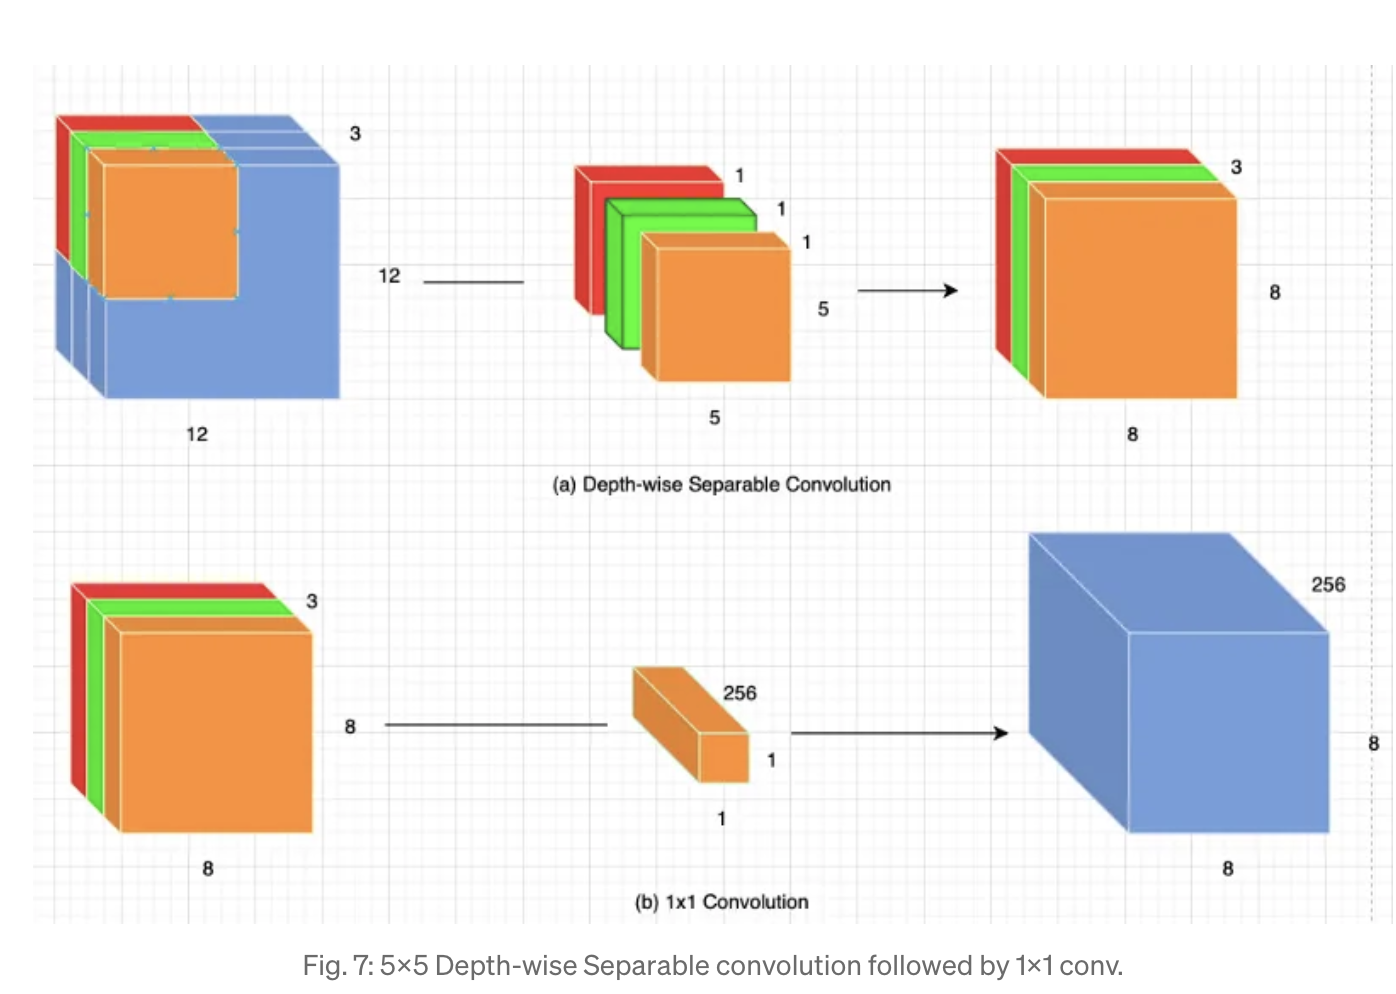

In [ ]:
import torch
import torch.nn as nn
import numpy as np


### Comparing number of parameters


In [ ]:


def compare_num_parameters(normal_conv, separable_conv, data):
  '''
    => (2, 3, 12, 12) => dw [5, 5, 1] 3x and groups=3 => (2, 3, 8, 8)
    => (2, 3, 8, 8) => pw [1, 1, 3] 64x => (2, 64, 8, 8)
    =>
  '''
  assert normal_conv(data).shape == separable_conv(data).shape

  normal_conv_params = sum([ p.nelement() for p in normal_conv.parameters() ])
  separable_conv_params = sum([ p.nelement() for p in separable_conv.parameters() ])

  print( f"Number of parameters in Normal Conv: {normal_conv_params} vs that of Sep Conv: {separable_conv_params}" )

data = torch.randn(size = (3, 12, 12) )
normal_conv = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5) # (64, 8, 8)

# groups is what makes it dw recall: dw =. Grp_conv
dw_conv = nn.Conv2d(in_channels=3, out_channels=3, groups=3, kernel_size=5)
pw_conv = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=1)

separable_conv = nn.Sequential(dw_conv, pw_conv)

compare_num_parameters( normal_conv, separable_conv, data )

Number of parameters in Normal Conv: 4864 vs that of Sep Conv: 334
